## 0. Indicaciones

**Resuelva los siguientes ejercicios acá mismo en un cuaderno de Jupyter con su nombre, código y la palabra `semana_11`. Importe todas las librerías que crea convenientes.**
### Estudiante:
#### Francisco Javier Díaz Perdomo   COD:201912252

$$
\newcommand{\pap}[1]{\left(#1\right)}
\newcommand{\pas}[1]{\left[#1\right]}
\newcommand{\pac}[1]{\left\{#1\right\}}
\newcommand{\pav}[1]{\left\vert#1\right\vert}
\newcommand{\rv}{\vec{r}}
\newcommand{\rb}{\mathbf{r}}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xv}{\vec{x}}
\newcommand{\ome}{\omega}
\newcommand{\eps}{\epsilon}
\newcommand{\iun}{\hat{\boldsymbol{\imath}}}
\newcommand{\jun}{\hat{\boldsymbol{\jmath}}}
\newcommand{\pr}{^{\prime}}
$$

In [19]:
!python -m pip install pyforest
!python -m pip install matplotlib
!python -m pip install scipy
!python -m pip install array_to_latex
import numpy as nmp
import matplotlib.pyplot as plt
import array_to_latex as a2l
from scipy.optimize import curve_fit as cfit
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

     |████████████████████████████████| 10.0 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 62.1 MB/s eta 0:00:01
  Created wheel for clipboard: filename=clipboard-0.0.4-py3-none-any.whl size=1849 sha256=86be308b17cd025ff3929f06fa0e49fc119e232b7431c988ff84b4591e5b087b
  Stored in directory: /home/jovyan/.cache/pip/wheels/76/06/fa/282b51f270aaab0f9141d8eec9016e29bce0e081861fabd4c8
  Created wheel for pyperclip: filename=pyperclip-1.8.0-py3-none-any.whl size=8692 sha256=34879a83b491b9e32fc20f196087ba0614ce102d81de3335f10639d2de3caaad
  Stored in directory: /home/jovyan/.cache/pip/wheels/e5/5e/f7/441179ddf6ac56f36cb1d84d94f35beedd5da15986ce3d321d
Successfully built clipboard pyperclip


## 0.1 Datos

Los siguientes datos son los casos acumulados detectados de *Covid-19* en Colombia desde el día 6 de marzo (día uno) hasta el día 14 de abril (día 39), los cuales están consignados en el *array* `y`. Estos datos han sido extraídos de la [página del INS](https://www.ins.gov.co/Noticias/Paginas/Coronavirus.aspx). El *array* `x` indica los días. El objetivo de este ejercicio será ajustar dichos datos con diferentes modelos, analizar la bondad del ajuste y sacar conclusiones interesantes con algunos de esos modelos. 

In [11]:
y=nmp.array([1,1, 1,    3,    9,   13,   16,   24,   45,   57,   75,
        102,  128,  175,  210,  240,  306,  419,  481,  491,  539,  608,
        702,  798,  906, 1065, 1161, 1267, 1406, 1485, 1579, 1780, 2054,
       2223, 2473, 2709, 2776, 2852, 2979])
x=nmp.linspace(1,len(y),len(y))

## 1. Modelo polinomial

### 1.1. Ajuste y gráfica (Valor 0.5)

Haga un ajuste de los datos con un polinomio de grado 3 y un polinomio de grado 4. Grafique los datos junto con estas dos curvas de ajuste.

### 1.2. Análisis de residuales y bondad de ajuste (Valor 0.7)

Haga una gráfica de residuales de los ajustes para cada uno de los polinomios de grado 3 y 4. Además, calcule el valor de $\chi_{\nu}^2$ y la matriz de covarianzas para cada caso. Con sus resultados, explique cuál ajuste sería más conveniente y si alguno de los dos está sobreajustado o subajustado. Estos últimos comentarios los debe hacer en una celda de **Markdown**.  

### 1.3. El día de máximo número de casos nuevos (Valor 0.6)
Una **curva epidemiológica** muestra el número de casos nuevos cada día y esencialmente es la derivada de la función de casos acumulados que queremos modelar. Si nuestro modelo es un polinomio de grado 3:
$$
p(x)=ax^3+bx^2+cx+d \:,
\tag{1}
$$
la curva epidemiológica será su derivada, 
$$
p\pr (x)=3ax^2+2bx+c\: .
\tag{2}
$$
Un dato importante para preparar la respuesta sanitaria es el día en el que el número de casos nuevos llega a su máximo. Este día $x_m$ se puede calcular derivando la curva epidemiológica e igualando a cero, es decir, $x_m =-\frac{b}{3a}$. Estime este día segun su modelo cúbico. ¿Tiene sentido el valor obtenido? Justifique su respuesta en una celda de **MarkDown**.

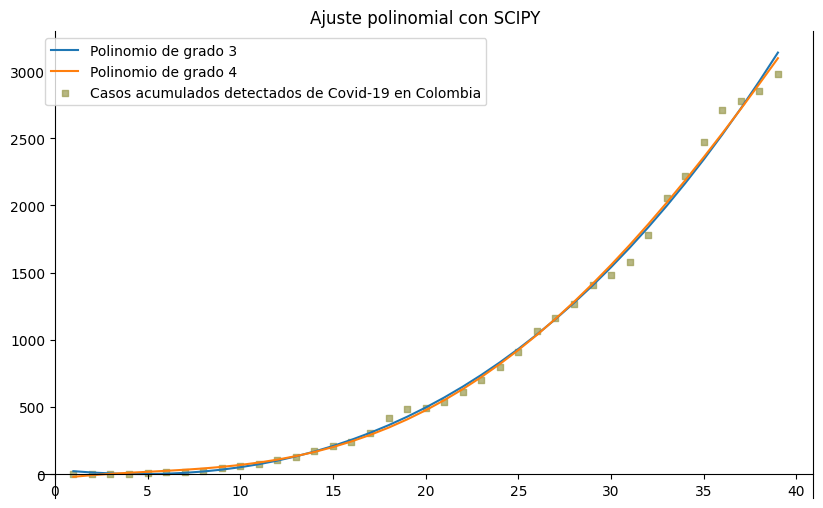

In [14]:
# 1. Modelo polinomial
# 1.1. Ajuste y gráfica

# Parámetros
xmin,xmax,npun=1,39,39
# Modelo cúbico
p3=lambda x,a,b,c,d:a*x**3+b*x**2+c*x+d
popt,pcov=cfit(p3,x,y)
a,b,c,d=popt
yp3=p3(x,a,b,c,d)
# Modelo cúbico
p4=lambda x,a,b,c,d,e:a*x**4+b*x**3+c*x**2+d*x+e
popt,pcov=cfit(p4,x,y)
a,b,c,d,e=popt
yp4=p4(x,a,b,c,d,e)
#######################################
# Gráfica de la función
#######################################
plt.figure(figsize=(10,10/1.618),dpi=100)
plt.scatter(x,y,s=25,color=(0.6,0.6,0.3,0.7),marker='s')
plt.plot(x,yp3)
plt.plot(x,yp4)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.set_title('Ajuste polinomial con SCIPY')
plt.legend(['Polinomio de grado 3','Polinomio de grado 4','Casos acumulados detectados de Covid-19 en Colombia'])
######################################

\begin{bmatrix}
  0.0001 & -0.0043 &  0.0694 & -0.2459\\
 -0.0043 &  0.2640 & -4.4423 &  16.6502\\
  0.0694 & -4.4423 &  79.2873 & -328.9645\\
 -0.2459 &  16.6502 & -328.9645 &  1734.9517
\end{bmatrix}
\begin{bmatrix}
  0.0000 & -0.0001 &  0.0014 & -0.0131 &  0.0291\\
 -0.0001 &  0.0045 & -0.1183 &  1.1109 & -2.5581\\
  0.0014 & -0.1183 &  3.2089 & -31.2492 &  75.8196\\
 -0.0131 &  1.1109 & -31.2492 &  321.7299 & -856.9570\\
  0.0291 & -2.5581 &  75.8196 & -856.9570 &  2832.3976
\end{bmatrix}


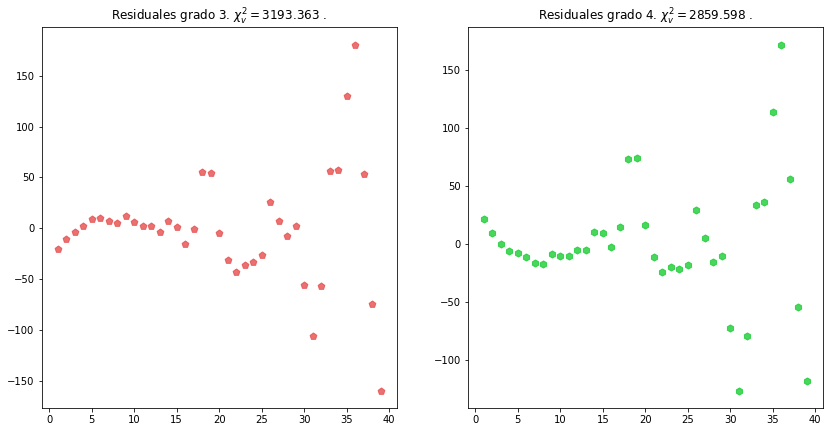

In [21]:
# 1.2. Análisis de residuales y bondad de ajuste

f=plt.figure(figsize=(14,7))
chis2=sum((y-yp3)**2)/(npun-1)
chis3=sum((y-yp4)**2)/(npun-1)
ax1 = f.add_subplot(121,title="Residuales grado 3. $\chi_v^2 = {0:0.3f}$ .".format(chis2))
ax2 = f.add_subplot(122,title="Residuales grado 4. $\chi_v^2 ={0:0.3f}$ .".format(chis3))
ax1.scatter(x,y-yp3,s=50,marker="p",color=(0.9,0.3,0.3,0.8))
ax2.scatter(x,y-yp4,s=50,marker="h",color=(0.1,0.8,0.2,0.8))

popt,pcov=cfit(p3,x,y)
a2l.to_ltx(pcov,frmt = '{:0.4f}')

popt,pcov=cfit(p4,x,y)
a2l.to_ltx(pcov,frmt = '{:0.4f}')


### Análisis de residuales:
 Dado el análisis anterior, podemos concluir que...
 
 Las matrices de covarianzas para cada caso son:

\begin{bmatrix}
  0.0001 & -0.0043 &  0.0694 & -0.2459\\
 -0.0043 &  0.2640 & -4.4423 &  16.6502\\
  0.0694 & -4.4423 &  79.2873 & -328.9645\\
 -0.2459 &  16.6502 & -328.9645 &  1734.9517
\end{bmatrix}

\begin{bmatrix}
  0.0000 & -0.0001 &  0.0014 & -0.0131 &  0.0291\\
 -0.0001 &  0.0045 & -0.1183 &  1.1109 & -2.5581\\
  0.0014 & -0.1183 &  3.2089 & -31.2492 &  75.8196\\
 -0.0131 &  1.1109 & -31.2492 &  321.7299 & -856.9570\\
  0.0291 & -2.5581 &  75.8196 & -856.9570 &  2832.3976
\end{bmatrix}

In [30]:
# 1.3. El día de máximo número de casos nuevos

p3=lambda x,a,b,c,d:a*x**3+b*x**2+c*x+d
popt,pcov=cfit(p3,x,y)
a,b,c,d=popt
print("Los coeficientes del polinomio de grado 3 son, en orden descendiente de grado: {0:0.2f}, \
{1:0.2f}, {2:0.2f}, {3:0.2f}".format(a,b,c,d))
xm1= ((-2*b)+((2*b)**2 -12*a*c)**(1/2))/(6*a)
xm2= ((-2*b)-((2*b)**2 -12*a*c)**(1/2))/(6*a)
print("Los puntos críticos del polinomio de grado 3 son: x1=",xm1," x2=",xm2)

print("Por tanto, tenemos que el día en el que el número de casos nuevos llega a su máximo es el máximo local, siendo este x2=", xm2)

Los coeficientes del polinomio de grado 3 son, en orden descendiente de grado: 0.03, 1.27, -13.89, 34.03
Los puntos críticos del polinomio de grado 3 son: x1= 4.713936466286034  x2= -33.95566973446799
Por tanto, tenemos que el día en el que el número de casos nuevos llega a su máximo es el máximo local, siendo este x2= -33.95566973446799


## 2. Modelo exponencial

### 2.1. Ajuste y gráfica (Valor 0.6)

Haga un ajuste de los datos con un modelo del tipo:
$$
\eta (x)=\eta_0 \exp(-r x) \;.
\tag{3}
$$
Al número $r$ se le conoce como **factor de contagio** e indica la probabilidad de que un caso acumulado contagie a otro persona por día. Grafique los datos observados junto con la curva del modelo exponencial ajustada.

### 2.2. Análisis de residuales y bondad de ajuste (Valor 0.8)

Haga una gráfica de residuales del ajuste del modelo exponencial. Además, calcule el valor de $\chi_{\nu}^2$ y la matriz de covarianzas. Con sus resultados, explique si este ajuste sería más conveniente que el de los casos polinómicos y si este ajuste está sobreajustado o subajustado. Estos últimos comentarios los debe hacer en una celda de **Markdown**. 

## 3. Modelo logístico

### 3.1. Ajuste y gráfica (Valor 0.5)

Haga un ajuste de los datos con un modelo del tipo:
$$
h(x)=\frac{A}{1+b \exp\pap{-rx}}\;.
\tag{4}
$$
El número $r$ es de nuevo un factor de contagio, el número $A$ indica el número de casos acumulados al final del brote epidémico, y el número $b$ está relacionado con el día de máximo número de casos. El número $A$ es muy importante, lo ideal sería que fuera lo más bajo posible. Grafique los datos observados junto con la curva del modelo logístico.

### 3.2. Análisis de residuales y bondad de ajuste (Valor 0.7)

Haga una gráfica de residuales del ajuste del modelo logístico. Además, calcule el valor de $\chi_{\nu}^2$ y la matriz de covarianzas. Con sus resultados, explique si este ajuste sería más conveniente que el de los casos anteriores y si este ajuste está sobreajustado o subajustado. Estos últimos comentarios los debe hacer en una celda de **Markdown**.  

### 3.3. El día de máximo número de casos nuevos (Valor 0.6)
El día máximo de número de casos $x_m$ también se puede calcular en este modelo logístico y es igual a $x_m = \frac{\ln b}{r}$. Note que la curva epidemiológica tiene la forma,
$$
h\pr (x)=\frac{rbA \exp\pap{-rx}}{\pas{1+b\exp\pap{-rx}}^2} \;.
\tag{5}
$$
Halle el día del máximo número de casos junto con el valor de $h\pr \pap{x_m}$. ¿Cuál de los dos modelos es más relevante para modelar la epidemia? ¿El modelo cúbico o el modelo logístico? Justifique su respuesta en una celda de **MarkDown**.